In [382]:
import numpy as np
import warnings
import math
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

warnings.simplefilter('ignore')

In [383]:

sample_count = 1000
frequency = 920.4e6
light_speed = 2.998e8
wave_length = light_speed / frequency
print(f"wave_length = {wave_length}")
angular_velocity = 2 * np.pi * frequency
antenna_gain_dbic = 8.5
antenna_gain_dbi = antenna_gain_dbic - 3.0
antenna_gain_watt = 10**((antenna_gain_dbi-30)/10)
tx_power_dBm = 32.5
tx_power_watt = 10**((tx_power_dBm-30)/10)
y_range_cm = [d for d in range(30,210,10)]
y_range_m = [y_cm/100 for y_cm in y_range_cm]
x_range_cm = [d for d in range(10,260,10)]
x_range_m = [x_cm/100 for x_cm in x_range_cm]

wave_length = 0.3257279443720122


## 垂直距離検証

In [384]:
df_list = []
for y in y_range_cm:
    df = pd.read_csv(f"data/pre-experiment/pre-experiment_y{int(y)}.csv")
    df["distance"]=pow((antenna_gain_watt**2)*(wave_length**2)/((4*np.pi)**3)*tx_power_watt/pow(10,((df["rssi"]-30)/10)), 1/4)
    df["relative_err"]=df["distance"]/(y/100) * 100
    df_list.append(df[:sample_count])

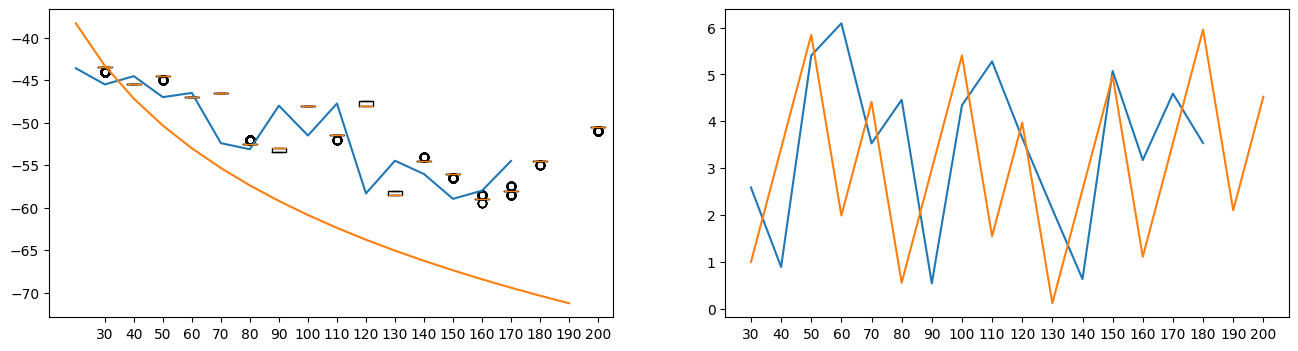

In [385]:
fig, axes =  plt.subplots(1,2, figsize=(16,4))
axes[0].boxplot([df["rssi"] for df in df_list])
axes[0].plot([df["rssi"].mean() for df in df_list])
axes[0].set_xticklabels(y_range_cm)
axes[0].plot([10*math.log10(antenna_gain_watt**2*wave_length**2*tx_power_watt/(4*np.pi)**3/y_m**4)+30 for y_m in y_range_m])
# axes[1].boxplot([df["phase"] for df in df_list])
axes[1].plot(y_range_cm, [df["phase"].mean() for df in df_list])
axes[1].plot(y_range_cm, [np.mod(-(4*np.pi*(y_cm/100)/wave_length), 2*np.pi) for y_cm in y_range_cm])
axes[1].set_xticks(y_range_cm)
fig.show()

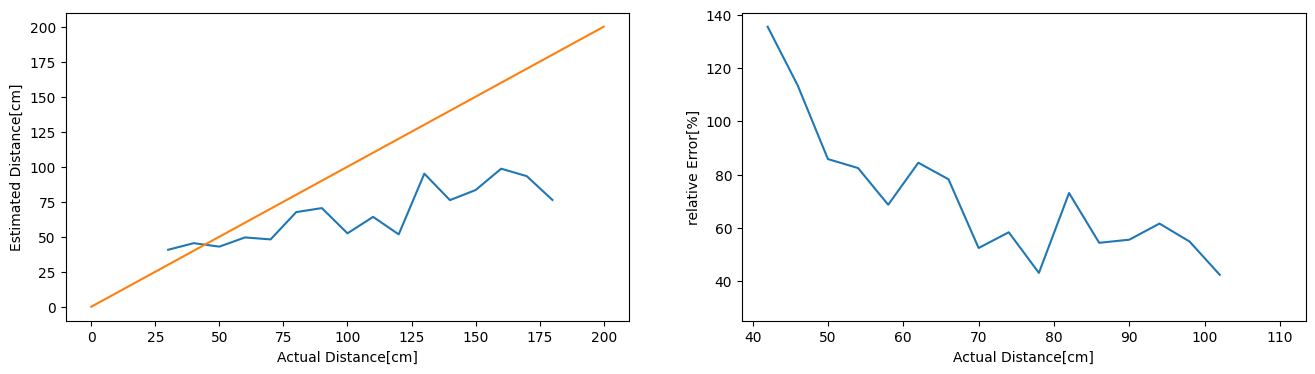

In [386]:
fig, axes =  plt.subplots(1,2, figsize=(16,4))
# axes[0].boxplot([df["distance"] for df in df_list])
axes[0].plot(y_range_cm, [df["distance"].mean()*100 for df in df_list])
axes[0].plot(range(0,210,10), range(0,210,10))
axes[0].set_xlabel("Actual Distance[cm]")
axes[0].set_ylabel("Estimated Distance[cm]")
# axes[1].boxplot([df["relative_err"] for df in df_list])
axes[1].plot(y_range_cm, [df["relative_err"].mean() for df in df_list])
axes[1].set_xticklabels(y_range_cm)
axes[1].set_xlabel("Actual Distance[cm]")
axes[1].set_ylabel("relative Error[%]")
fig.show()

## 水平方向検証

In [387]:
df_list = []
for x in x_range_cm:
    df = pd.read_csv(f"data/pre-experiment/pre-experiment_x{int(x)}.csv")
    df_list.append(df[:sample_count])

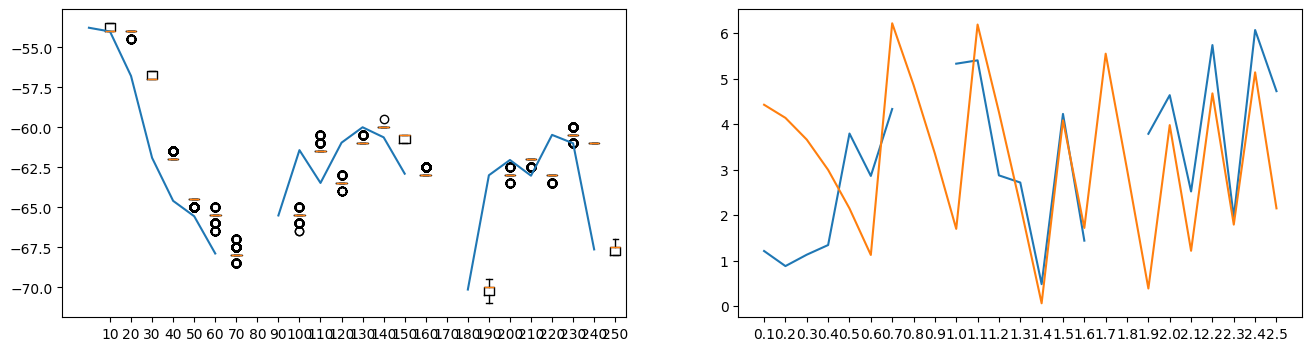

In [388]:
fig, axes =  plt.subplots(1,2, figsize=(16,4))
axes[0].boxplot([df["rssi"] for df in df_list])
axes[0].plot([df["rssi"].mean() for df in df_list])
axes[0].set_xticklabels(x_range_cm)
# axes[1].boxplot([df["phase"] for df in df_list])
axes[1].plot(x_range_m,[df["phase"].mean() for df in df_list])
# axes[1].set_xticklabels(x_range_cm)
axes[1].plot(x_range_m, [np.mod(-(4*np.pi*np.sqrt(x_m**2+2.0**2)/wave_length), 2*np.pi) for x_m in x_range_m])
axes[1].set_xticks(x_range_m)
fig.show()